# 필요한 라이브러리 import

In [ ]:
!pip install geneticalgorithm
import pandas as pd 
import numpy as np
import random
import math
import numpy as np
from geneticalgorithm import geneticalgorithm as ga


# 구글드라이브 마운트 및 데이터 불러오기

In [ ]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)


Mounted at /gdrive


In [ ]:
df = pd.read_csv('/gdrive/MyDrive/cj공유폴더/df_countver0.5.csv')

In [ ]:
df

,Unnamed: 0,CORP_ID,SHPR_CD,X,Y,count,address,distance_군포,distance_곤지암
0,0,GP001,90001664,126.297926,36.745605,1,충청남도 태안군,109.395,191.397
1,1,GP001,90001664,126.392266,34.811824,2,전라남도 목포시,332.295,361.643
2,2,GP001,90001664,126.450334,36.784876,2,충청남도 서산시,91.411,173.412
3,3,GP001,90001664,126.481705,34.990341,1,전라남도 무안군,306.374,335.722
4,4,GP001,90001664,126.488040,37.746568,1,인천광역시 강화군,81.888,112.522
...,...,...,...,...,...,...,...,...,...
5162,5162,KX007,90001683,129.343165,36.018995,12,경상북도 포항시,311.153,289.073
5163,5163,KX007,90001683,129.361147,35.582747,7,울산광역시 북구,342.822,321.085
5164,5164,KX007,90001683,129.365307,36.415062,1,경상북도 영덕군,305.018,289.041
5165,5165,KX007,90001683,129.400547,36.993035,3,경상북도 울진군,276.291,261.124


# 개수 올림 ex) 49.222 > 50

In [ ]:
def ceil(x):
  x.math.ceil
  return x
  
df['count'] = df['count'].apply(math.ceil)

# 변수 범위 지정

In [ ]:
input= df.values

In [ ]:
varbound = []

In [ ]:
for i in range(len(input)) :
  varbound.append( [0,input[i][5] ] )

In [ ]:
varbound = np.array(varbound)

In [ ]:
df

,Unnamed: 0,CORP_ID,SHPR_CD,X,Y,count,address,distance_군포,distance_곤지암
0,0,GP001,90001664,126.297926,36.745605,1,충청남도 태안군,109.395,191.397
1,1,GP001,90001664,126.392266,34.811824,2,전라남도 목포시,332.295,361.643
2,2,GP001,90001664,126.450334,36.784876,2,충청남도 서산시,91.411,173.412
3,3,GP001,90001664,126.481705,34.990341,1,전라남도 무안군,306.374,335.722
4,4,GP001,90001664,126.488040,37.746568,1,인천광역시 강화군,81.888,112.522
...,...,...,...,...,...,...,...,...,...
5162,5162,KX007,90001683,129.343165,36.018995,12,경상북도 포항시,311.153,289.073
5163,5163,KX007,90001683,129.361147,35.582747,7,울산광역시 북구,342.822,321.085
5164,5164,KX007,90001683,129.365307,36.415062,1,경상북도 영덕군,305.018,289.041
5165,5165,KX007,90001683,129.400547,36.993035,3,경상북도 울진군,276.291,261.124


# 유전알고리즘 모델링

In [ ]:
input

In [ ]:
df

 The best solution found:
 [0. 0. 1. ... 0. 1. 1.]

 Objective function:
 43458649.76199988


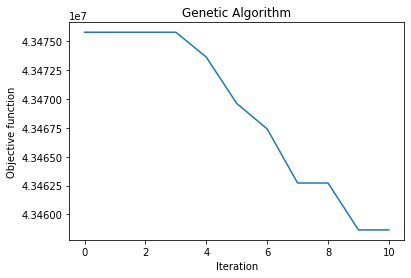

In [ ]:
global cost
cost = 100000000000000000000000000
global X_list
X_list = []

def f(X):
  cost_distance = 0
  goonpo_capa = 0
  gonzi_capa = 0
  global cost
  global X_list
  Y_list = []
  for i in range(len(X)):
    goonpo = X[i]
    gonzi = input[i][5] - X[i]
    gonzi_capa = gonzi_capa + gonzi
    goonpo_capa = goonpo_capa + goonpo
        
    if goonpo_capa > 80000:
      goonpo_capa = goonpo_capa - goonpo
      goonpo = 0
      gonzi = input[i][5]
      X[i] = 0 


    if gonzi_capa > 250000:
      gonzi_capa = gonzi_capa - gonzi
      gonzi = 0
      goonpo = input[i][5]
      X[i] = goonpo
    Y_list.append(X[i])
    cost_distance += input[i][7]* goonpo + input[i][8] *gonzi 

  if cost > cost_distance:
    cost = cost_distance
    for j in range(len(X)):
      X_list = Y_list
    

  return cost_distance


algorithm_param = {'max_num_iteration': 1000,\
                  'population_size': 100,\
                  'mutation_probability':0.01,\
                  'elit_ratio': 0.01,\
                  'crossover_probability': 0.5,\
                  'parents_portion': 0.3,\
                  'crossover_type':'uniform',\
                  'max_iteration_without_improv':50}


model=ga(function=f,dimension=len(input),variable_type='int',variable_boundaries=varbound, algorithm_parameters=algorithm_param)
model.run()

In [ ]:
cost

In [ ]:
df

,Unnamed: 0,CORP_ID,SHPR_CD,X,Y,count,address,distance_군포,distance_곤지암
0,0,GP001,90001664,126.297926,36.745605,1,충청남도 태안군,109.395,191.397
1,1,GP001,90001664,126.392266,34.811824,2,전라남도 목포시,332.295,361.643
2,2,GP001,90001664,126.450334,36.784876,2,충청남도 서산시,91.411,173.412
3,3,GP001,90001664,126.481705,34.990341,1,전라남도 무안군,306.374,335.722
4,4,GP001,90001664,126.488040,37.746568,1,인천광역시 강화군,81.888,112.522
...,...,...,...,...,...,...,...,...,...
5162,5162,KX007,90001683,129.343165,36.018995,12,경상북도 포항시,311.153,289.073
5163,5163,KX007,90001683,129.361147,35.582747,7,울산광역시 북구,342.822,321.085
5164,5164,KX007,90001683,129.365307,36.415062,1,경상북도 영덕군,305.018,289.041
5165,5165,KX007,90001683,129.400547,36.993035,3,경상북도 울진군,276.291,261.124


In [ ]:
df['solution_군포'] = X_list

In [ ]:
df['solution_곤지암'] = df['count'] - df['solution_군포']

In [ ]:
df['solution_곤지암'].sum()

227280.0

In [ ]:
df['solution_군포'].sum()

80000.0

In [ ]:
df

,Unnamed: 0,CORP_ID,SHPR_CD,X,Y,count,address,distance_군포,distance_곤지암,solution_군포,solution_곤지암
0,0,GP001,90001664,126.297926,36.745605,1,충청남도 태안군,109.395,191.397,0.0,1.0
1,1,GP001,90001664,126.392266,34.811824,2,전라남도 목포시,332.295,361.643,0.0,2.0
2,2,GP001,90001664,126.450334,36.784876,2,충청남도 서산시,91.411,173.412,1.0,1.0
3,3,GP001,90001664,126.481705,34.990341,1,전라남도 무안군,306.374,335.722,1.0,0.0
4,4,GP001,90001664,126.488040,37.746568,1,인천광역시 강화군,81.888,112.522,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
5162,5162,KX007,90001683,129.343165,36.018995,12,경상북도 포항시,311.153,289.073,0.0,12.0
5163,5163,KX007,90001683,129.361147,35.582747,7,울산광역시 북구,342.822,321.085,0.0,7.0
5164,5164,KX007,90001683,129.365307,36.415062,1,경상북도 영덕군,305.018,289.041,0.0,1.0
5165,5165,KX007,90001683,129.400547,36.993035,3,경상북도 울진군,276.291,261.124,0.0,3.0


# 결과 확인

In [ ]:
df_result = pd.read_csv('/content/drive/MyDrive/cj공유폴더/결과_2.csv')

FileNotFoundError: ignored

In [ ]:
result= df_result.values

In [ ]:
df_result['solution_군포'].sum()

In [ ]:
a = 0 
for i in range (len(df_result)) :
  a += result[i][8]*result[i][10] + result[i][9] *result[i][11] 
print(a)